<a href="https://colab.research.google.com/github/prathamnishad/image-classification/blob/master/pytorch_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import zipfile
data = r'/content/drive/My Drive/data (1)'


In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import useful tools
from PIL import Image
import cv2

# import data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
os.chdir(data)
os.listdir()

['train.csv', 'train', 'test']

In [4]:
import pandas as pd
path=""
train=os.path.join(path,"train")
test=os.path.join(path,"test")
df=pd.read_csv(os.path.join(path,"train.csv"))
print(len(os.listdir(train)))
print(len(os.listdir(test)))

3430
10


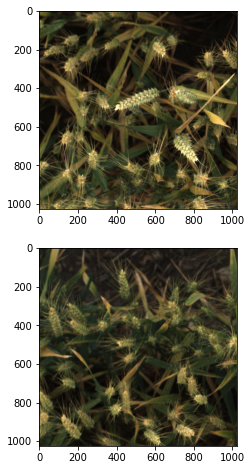

In [5]:
fig, ax = plt.subplots(2, 1, figsize=(16, 8))
ax[0].imshow(plt.imread(os.path.join(train,os.listdir(train)[1])))
ax[1].imshow(plt.imread(os.path.join(train,os.listdir(train)[2])))

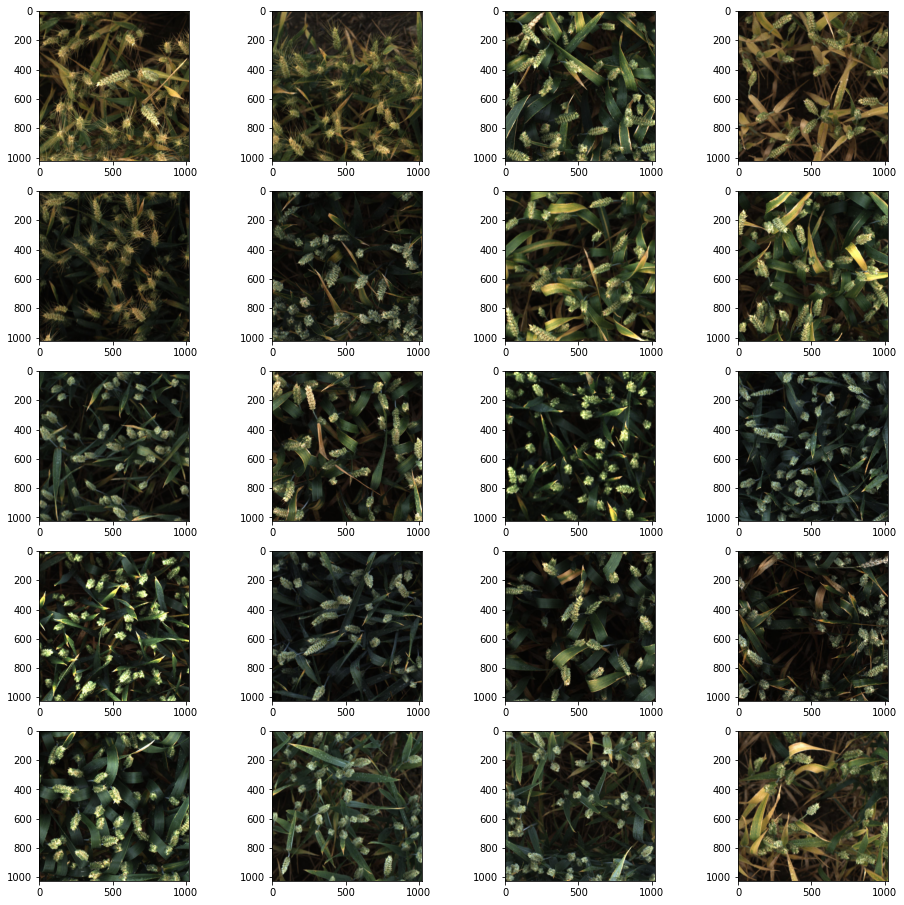

In [6]:
fig=plt.figure(figsize=(16,16))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = plt.imread(os.path.join(train,os.listdir(train)[i]))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [7]:
df.head()

image_id  width  height                         bbox   source
0  b6ab77fd7   1024    1024   [834.0, 222.0, 56.0, 36.0]  usask_1
1  b6ab77fd7   1024    1024  [226.0, 548.0, 130.0, 58.0]  usask_1
2  b6ab77fd7   1024    1024  [377.0, 504.0, 74.0, 160.0]  usask_1
3  b6ab77fd7   1024    1024  [834.0, 95.0, 109.0, 107.0]  usask_1
4  b6ab77fd7   1024    1024  [26.0, 144.0, 124.0, 117.0]  usask_1

In [8]:
df["image"]=df["image_id"].apply(lambda x: str(x)+r".jpg")
df.image.head()

0    b6ab77fd7.jpg
1    b6ab77fd7.jpg
2    b6ab77fd7.jpg
3    b6ab77fd7.jpg
4    b6ab77fd7.jpg
Name: image, dtype: object

In [0]:
def get_boxes(id):
    boxes=[]
    for i in df[df["image"]==str(id)]["bbox"]:
        boxes.append(list(map(float,i[1:-1].split(", "))))
    return boxes

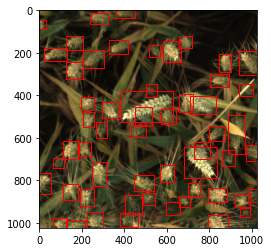

In [10]:
im = plt.imread(os.path.join(train,os.listdir(train)[1]))
bbox=get_boxes(os.listdir(train)[1])

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

for i in bbox:
    # Create a Rectangle patch
    rect = patches.Rectangle((i[0],i[1]),i[2],i[3],linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()

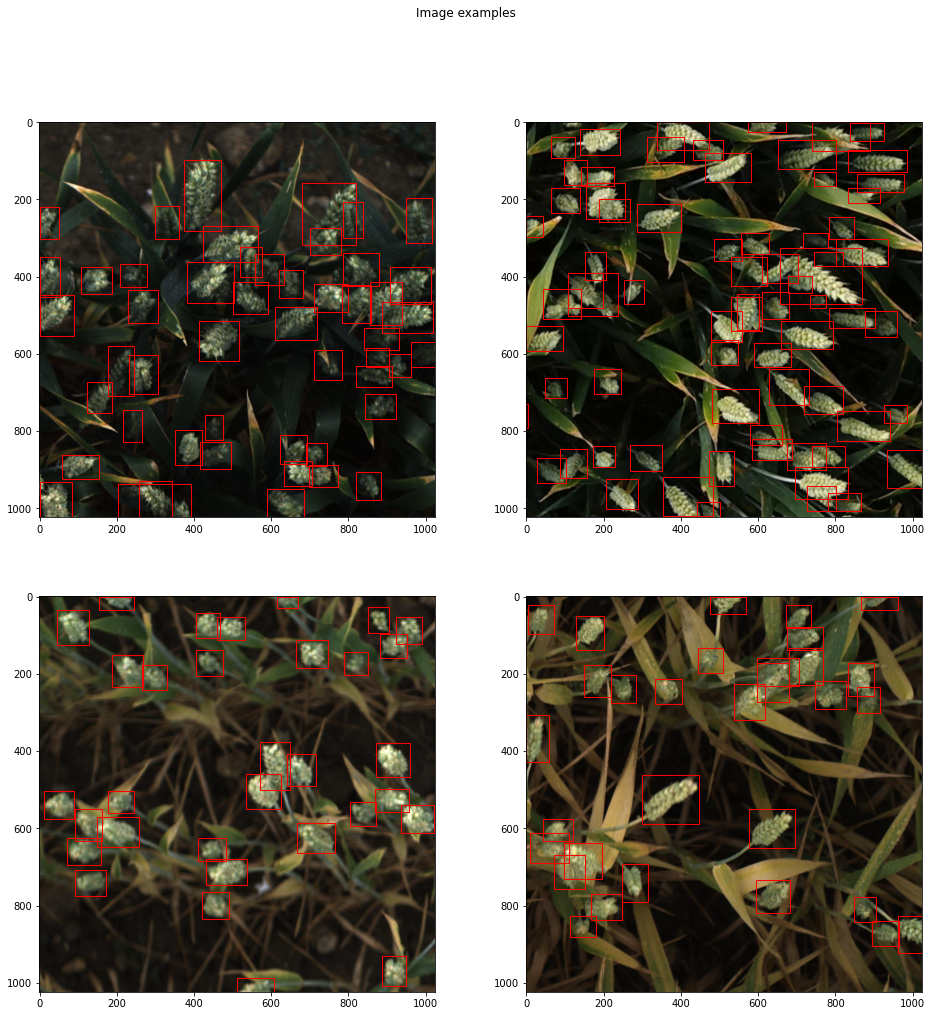

In [11]:
import numpy as np
def plot_images(df, rows=3, cols=3, title='Image examples'):
    fig, axs = plt.subplots(rows, cols, figsize=(16,16))
    for row in range(rows):
        for col in range(cols):
            idx = np.random.randint(len(df), size=1)[0]
            img_id = df.iloc[idx].image
            
            img = plt.imread(os.path.join(train,img_id))
            axs[row, col].imshow(img)
            
            bboxes = get_boxes(img_id)
            
            for bbox in bboxes:
                rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=1,edgecolor='r',facecolor='none')
                axs[row, col].add_patch(rect)
            
            #axs[row, col].axis('off')
            
    plt.suptitle(title)
plot_images(df,2,2)

In [13]:
train_df=df
train_df['x'] = -1
train_df['y'] = -1
train_df['w'] = -1
train_df['h'] = -1

def expand_bbox(x):
    r = np.array(re.findall("([0-9]+[.]?[0-9]*)", x))
    if len(r) == 0:
        r = [-1, -1, -1, -1]
    return r
train_df.head()

image_id  width  height                         bbox  ...  x  y  w  h
0  b6ab77fd7   1024    1024   [834.0, 222.0, 56.0, 36.0]  ... -1 -1 -1 -1
1  b6ab77fd7   1024    1024  [226.0, 548.0, 130.0, 58.0]  ... -1 -1 -1 -1
2  b6ab77fd7   1024    1024  [377.0, 504.0, 74.0, 160.0]  ... -1 -1 -1 -1
3  b6ab77fd7   1024    1024  [834.0, 95.0, 109.0, 107.0]  ... -1 -1 -1 -1
4  b6ab77fd7   1024    1024  [26.0, 144.0, 124.0, 117.0]  ... -1 -1 -1 -1

[5 rows x 10 columns]

In [15]:
import re
train_df[['x', 'y', 'w', 'h']] = np.stack(train_df['bbox'].apply(lambda x: expand_bbox(x))) ##Lets convert the Box in 
train_df['x'] = train_df['x'].astype(np.float)                                        #in our desired formate    
train_df['y'] = train_df['y'].astype(np.float)
train_df['w'] = train_df['w'].astype(np.float)
train_df['h'] = train_df['h'].astype(np.float)
train_df.head()

image_id  width  height  ...      y      w      h
0  b6ab77fd7   1024    1024  ...  222.0   56.0   36.0
1  b6ab77fd7   1024    1024  ...  548.0  130.0   58.0
2  b6ab77fd7   1024    1024  ...  504.0   74.0  160.0
3  b6ab77fd7   1024    1024  ...   95.0  109.0  107.0
4  b6ab77fd7   1024    1024  ...  144.0  124.0  117.0

[5 rows x 10 columns]

In [18]:
# train_df=train_df.drop(columns=["image" 'width','height','source']) #Drop unwanted columns
# train_df.head()
train_df.drop(columns="image",inplace=True)
train_df.head()

image_id                         bbox      x      y      w      h
0  b6ab77fd7   [834.0, 222.0, 56.0, 36.0]  834.0  222.0   56.0   36.0
1  b6ab77fd7  [226.0, 548.0, 130.0, 58.0]  226.0  548.0  130.0   58.0
2  b6ab77fd7  [377.0, 504.0, 74.0, 160.0]  377.0  504.0   74.0  160.0
3  b6ab77fd7  [834.0, 95.0, 109.0, 107.0]  834.0   95.0  109.0  107.0
4  b6ab77fd7  [26.0, 144.0, 124.0, 117.0]   26.0  144.0  124.0  117.0

In [19]:
image_ids = train_df['image_id'].unique()
type(image_ids)

numpy.ndarray

In [20]:
image_ids = train_df['image_id'].unique()
valid_ids = image_ids[-665:]
train_ids = image_ids[:-665]

valid_df = train_df[train_df['image_id'].isin(valid_ids)]
train_df = train_df[train_df['image_id'].isin(train_ids)]
type(valid_ids)
print(len(train_df))

122787


In [0]:
import cv2
import os
import re
import torch
import torchvision
from torchvision import transforms 
import numpy as np
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torch.utils.data import DataLoader, Dataset
from torch.utils.data.sampler import SequentialSampler
from matplotlib import pyplot as plt

In [23]:
trans = transforms.Compose([transforms.ToTensor()])   #Apply transform to image 
type(trans)

torchvision.transforms.transforms.Compose

In [0]:
class WheatDataset(Dataset):

    def __init__(self, dataframe, image_dir, transforms=None,train=True):
        super().__init__()

        self.image_ids = dataframe['image_id'].unique()
        self.df = dataframe
        self.image_dir = image_dir
        self.transforms = transforms
        self.train=train

    def __len__(self) -> int:
        return self.image_ids.shape[0]

    def __getitem__(self, index: int):

        image_id = self.image_ids[index]
        image = cv2.imread(f'{self.image_dir}/{image_id}.jpg', cv2.IMREAD_COLOR)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB).astype(np.float32)
        image /= 255.0
        if self.transforms is not None:  #Apply transformation
            image = self.transforms(image)
        if(self.train==False):  # For test data
            return image, image_id
        #Else for train and validation data
        records = self.df[self.df['image_id'] == image_id]   
        boxes = records[['x', 'y', 'w', 'h']].values
        boxes[:, 2] = boxes[:, 0] + boxes[:, 2]
        boxes[:, 3] = boxes[:, 1] + boxes[:, 3]
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        
        area = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        area = torch.as_tensor(area, dtype=torch.float32)

        # there is only one class
        labels = torch.ones((records.shape[0],), dtype=torch.int64)
        
        # suppose all instances are not crowd
        iscrowd = torch.zeros((records.shape[0],), dtype=torch.int64)
        
        target = {}
        target['boxes'] = boxes
        target['labels'] = labels
        target['image_id'] = torch.tensor([index])
        target['area'] = area
        target['iscrowd'] = iscrowd

        return image, target,image_id  

In [25]:
train=os.path.join("train")
test=os.path.join("train")
x=WheatDataset(train_df,train)
x.__len__()

2708

In [0]:
class Averager:      ##Return the average loss 
    def __init__(self):
        self.current_total = 0.0
        self.iterations = 0.0

    def send(self, value):
        self.current_total += value
        self.iterations += 1

    @property
    def value(self):
        if self.iterations == 0:
            return 0
        else:
            return 1.0 * self.current_total / self.iterations

    def reset(self):
        self.current_total = 0.0
        self.iterations = 0.0
        
        
def collate_fn(batch):
    return tuple(zip(*batch))

train_dataset = WheatDataset(train_df, train, trans,True)
valid_dataset = WheatDataset(valid_df, train, trans,True)


# split the dataset in train and test set
indices = torch.randperm(len(train_dataset)).tolist()

train_data_loader = DataLoader(
    train_dataset,
    batch_size=16,
    shuffle=False,
    num_workers=4,
    collate_fn=collate_fn
)

valid_data_loader = DataLoader(
    valid_dataset,
    batch_size=8,
    shuffle=False,
    num_workers=4,
    collate_fn=collate_fn
)

#device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [31]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


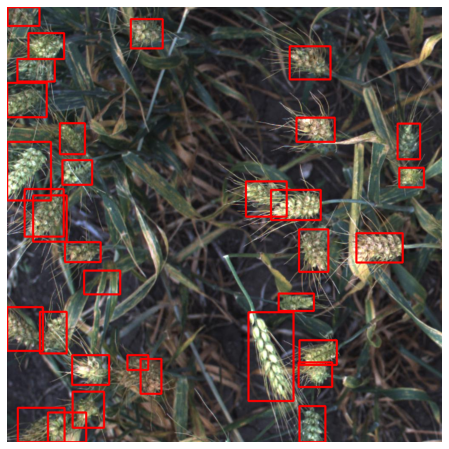

In [72]:
images, targets, image_ids = next(iter(train_data_loader))
images = list(image.to(device) for image in images)
targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

boxes = targets[3]['boxes'].cpu().numpy().astype(np.int32)
sample = images[3].permute(1,2,0).cpu().numpy()

fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for box in boxes:
    cv2.rectangle(sample,
                  (box[0], box[1]),
                  (box[2], box[3]),
                  (220, 0, 0), 3)
    
ax.set_axis_off()
ax.imshow(sample)

In [41]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, pretrained_backbone=False)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


In [0]:
num_classes = 2  # 1 class (wheat) + background

# get number of input features for the classifier
in_features = model.roi_heads.box_predictor.cls_score.in_features

# replace the pre-trained head with a new one
model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)

# Load the trained weights
#model.load_state_dict(torch.load(WEIGHTS_FILE))  ##Load pre trained weights
#model.eval()

#x = model.to(device)

In [43]:
model.train()
model.to(device)
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.01, momentum=0.9, weight_decay=0.00001)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.5)
#lr_scheduler = None

num_epochs = 5

loss_hist = Averager()
itr = 1

for epoch in range(num_epochs):
    loss_hist.reset()
    
    for images, targets, image_ids in train_data_loader:
        
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)   ##Return the loss

        losses = sum(loss for loss in loss_dict.values())
        loss_value = losses.item()

        loss_hist.send(loss_value)  #Average out the loss

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        if itr % 50 == 0:
            print(f"Iteration #{itr} loss: {loss_value}")

        itr += 1
    
    # update the learning rate
    if lr_scheduler is not None:
        lr_scheduler.step()

    print(f"Epoch #{epoch} loss: {loss_hist.value}")

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


Iteration #50 loss: 0.8937972784042358
Iteration #100 loss: 0.785007894039154
Iteration #150 loss: 0.6573660373687744
Epoch #0 loss: 0.8646320165956721
Iteration #200 loss: 0.7615535259246826
Iteration #250 loss: 0.708605945110321
Iteration #300 loss: 0.5808460712432861
Epoch #1 loss: 0.7183951777570388
Iteration #350 loss: 0.6407393217086792
Iteration #400 loss: 0.7419304847717285
Iteration #450 loss: 0.5231420993804932
Iteration #500 loss: 0.6322837471961975
Epoch #2 loss: 0.7001647358431535
Iteration #550 loss: 0.6953105330467224
Iteration #600 loss: 0.7736597061157227
Iteration #650 loss: 0.7704880833625793
Epoch #3 loss: 0.6809366673231125
Iteration #700 loss: 0.8168148398399353
Iteration #750 loss: 0.7674418687820435
Iteration #800 loss: 0.5531346797943115
Iteration #850 loss: 0.5391409397125244
Epoch #4 loss: 0.6667465204701705


In [46]:
submit=pd.read_csv(os.listdir()[-1])
submit.head()

image_id PredictionString
0  aac893a91    1.0 0 0 50 50
1  51f1be19e    1.0 0 0 50 50
2  f5a1f0358    1.0 0 0 50 50
3  796707dd7    1.0 0 0 50 50
4  51b3e36ab    1.0 0 0 50 50

In [59]:
test=os.path.join("test")
print(test)

test


In [0]:
test_dataset = WheatDataset(submit,test, trans,False)

In [0]:
print(next(iter(test_dataset)))

In [0]:
test_data_loader = DataLoader( test_dataset, batch_size=8, shuffle=False)  ##Test dataloader

In [0]:
detection_threshold = 0.45

In [0]:
def format_prediction_string(boxes, scores): ## Define the formate for storing prediction results
    pred_strings = []
    for j in zip(scores, boxes):
        pred_strings.append("{0:.4f} {1} {2} {3} {4}".format(j[0], j[1][0], j[1][1], j[1][2], j[1][3]))

    return " ".join(pred_strings)

In [65]:
## Lets make the prediction
results=[]
model.eval()

for images, image_ids in test_data_loader:    

    images = list(image.to(device) for image in images)
    outputs = model(images)

    for i, image in enumerate(images):

        boxes = outputs[i]['boxes'].data.cpu().numpy()    ##Formate of the output's box is [Xmin,Ymin,Xmax,Ymax]
        scores = outputs[i]['scores'].data.cpu().numpy()
        
        boxes = boxes[scores >= detection_threshold].astype(np.int32) #Compare the score of output with the threshold and
        scores = scores[scores >= detection_threshold]                    #slelect only those boxes whose score is greater
                                                                          # than threshold value
        image_id = image_ids[i]
        
        boxes[:, 2] = boxes[:, 2] - boxes[:, 0]         
        boxes[:, 3] = boxes[:, 3] - boxes[:, 1]         #Convert the box formate to [Xmin,Ymin,W,H]
        
        
            
        result = {                                     #Store the image id and boxes and scores in result dict.
            'image_id': image_id,
            'PredictionString': format_prediction_string(boxes, scores)
        }

        
        results.append(result)              #Append the result dict to Results list

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [66]:
test_df = pd.DataFrame(results, columns=['image_id', 'PredictionString'])
test_df.head()

image_id                                   PredictionString
0  aac893a91  0.9892 71 0 99 157 0.9872 615 910 78 110 0.980...
1  51f1be19e  0.9693 759 873 157 108 0.9680 601 68 177 185 0...
2  f5a1f0358  0.9744 150 243 80 89 0.9720 883 633 91 142 0.9...
3  796707dd7  0.9469 896 325 110 91 0.9370 504 781 92 95 0.9...
4  51b3e36ab  0.9892 232 632 96 165 0.9882 866 284 158 134 0...

In [0]:
sample = images[1].permute(1,2,0).cpu().numpy()
boxes = outputs[1]['boxes'].data.cpu().numpy()
scores = outputs[1]['scores'].data.cpu().numpy()

boxes = boxes[scores >= detection_threshold].astype(np.int32)

In [0]:
print(boxes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


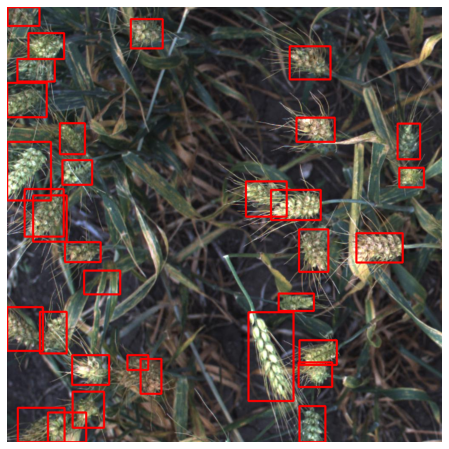

In [74]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for box in boxes:
  cv2.rectangle(sample,
                (box[0], box[1]),
                (box[2], box[3]),
                (220, 0, 0), 2)
    
ax.set_axis_off()
ax.imshow(sample)

In [0]:
model1 = torch.load("../OD.pt")
model1.eval()


In [78]:
## Lets make the prediction
results=[]
model1.eval()

for images, image_ids in test_data_loader:    

    images = list(image.to(device) for image in images)
    outputs = model1(images)

    for i, image in enumerate(images):

        boxes = outputs[i]['boxes'].data.cpu().numpy()    ##Formate of the output's box is [Xmin,Ymin,Xmax,Ymax]
        scores = outputs[i]['scores'].data.cpu().numpy()
        
        boxes = boxes[scores >= detection_threshold].astype(np.int32) #Compare the score of output with the threshold and
        scores = scores[scores >= detection_threshold]                    #slelect only those boxes whose score is greater
                                                                          # than threshold value
        image_id = image_ids[i]
        
        boxes[:, 2] = boxes[:, 2] - boxes[:, 0]         
        boxes[:, 3] = boxes[:, 3] - boxes[:, 1]         #Convert the box formate to [Xmin,Ymin,W,H]
        
        
            
        result = {                                     #Store the image id and boxes and scores in result dict.
            'image_id': image_id,
            'PredictionString': format_prediction_string(boxes, scores)
        }

        
        results.append(result)              #Append the result dict to Results list

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


In [0]:
sample = images[1].permute(1,2,0).cpu().numpy()
boxes = outputs[1]['boxes'].data.cpu().numpy()
scores = outputs[1]['scores'].data.cpu().numpy()

boxes = boxes[scores >= detection_threshold].astype(np.int32)

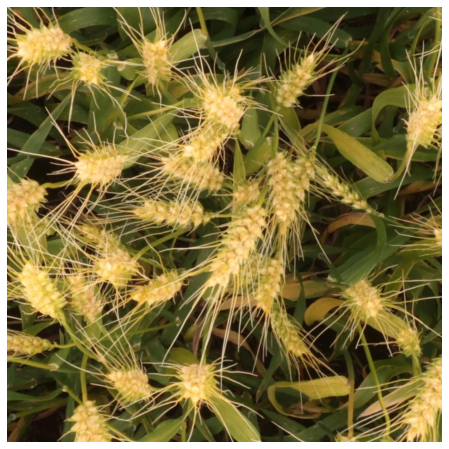

In [81]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8))

for box in boxes:
  cv2.rectangle(sample,
                (box[0], box[1]),
                (box[2], box[3]),
                (220, 0, 0), 2)
    
ax.set_axis_off()
ax.imshow(sample)